In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
with open('../tracker_stubs/ball_detections.pkl','rb') as f:
    ball_pos=pickle.load(f)

In [8]:
ball_pos=[x.get(1,[]) for x in ball_pos]
df_ball_pos=pd.DataFrame(ball_pos,columns=['x1','y1','x2','y2']) #LISTS TO DF

df_ball_pos=df_ball_pos.interpolate()
df_ball_pos=df_ball_pos.bfill() #TO HANDLE NULL DETECTION IN FIRST FRAME

ball_pos=[{1:x} for x in df_ball_pos.to_numpy().tolist()]

In [ ]:
df_ball_pos['mid_y']=(df_ball_pos['y1']+df_ball_pos['y2'])/2
df_ball_pos['mid_y_rolling_mean']=df_ball_pos['mid_y'].rolling(window=5,min_periods=1,center=False).mean()
df_ball_pos['delta_y']=df_ball_pos['mid_y_rolling_mean'].diff()


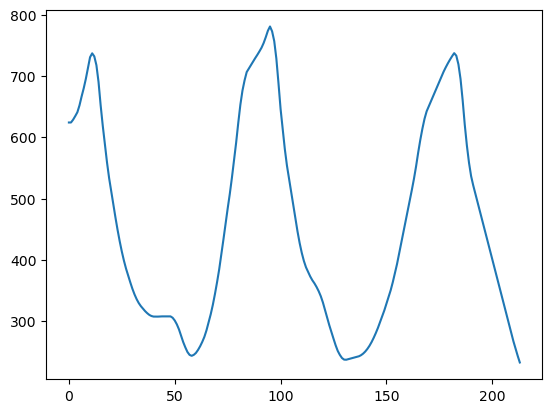

In [10]:
plt.plot(df_ball_pos['mid_y_rolling_mean'])

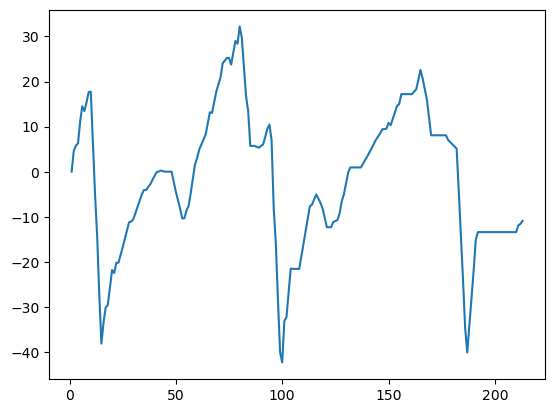

In [11]:
df_ball_pos['delta_y']=df_ball_pos['mid_y_rolling_mean'].diff()
plt.plot(df_ball_pos['delta_y'])

In [12]:
df_ball_pos['ball_hit']=0


In [ ]:
df_ball_pos['mid_y']=(df_ball_pos['y1']+df_ball_pos['y2'])/2
df_ball_pos['mid_y_rolling_mean']=df_ball_pos['mid_y'].rolling(window=5,min_periods=1,center=False).mean()
df_ball_pos['delta_y']=df_ball_pos['mid_y_rolling_mean'].diff()


min_change_frames_for_hit=25
for i in range (1,len(df_ball_pos)-int(min_change_frames_for_hit*1.2)):
    neg_pos_change=df_ball_pos['delta_y'].iloc[i]>0 and df_ball_pos['delta_y'].iloc[i+1]<0
    pos_pos_change=df_ball_pos['delta_y'].iloc[i]<0 and df_ball_pos['delta_y'].iloc[i+1]>0

    if neg_pos_change or pos_pos_change:
        change_cnt=0
        for change_frame in range(i+1,i+int(min_change_frames_for_hit*1.2)+1):
            neg_pos_change_fol_frame=df_ball_pos['delta_y'].iloc[i]>0 and df_ball_pos['delta_y'].iloc[change_frame]<0
            pos_pos_change_fol_frame=df_ball_pos['delta_y'].iloc[i]<0 and df_ball_pos['delta_y'].iloc[change_frame]>0
        
            if neg_pos_change and neg_pos_change_fol_frame:
                change_cnt+=1
            elif pos_pos_change and pos_pos_change_fol_frame:
                change_cnt+=1
        if change_cnt>min_change_frames_for_hit-1:
            df_ball_pos['ball_hit'].iloc[i]=1

ball_hit_frames=df_ball_pos[df_ball_pos['ball_hit']==1].index.to_list()


C:\Users\arhaa\AppData\Local\Temp\ipykernel_19404\1976837425.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_pos['ball_hit'].iloc[i]=1


In [ ]:
df_ball_pos[df_ball_pos['ball_hit']==1]     

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,777.454834,716.997070,798.839722,739.887451,728.442261,737.160510,6.327875,1
58,925.122461,241.005972,938.859326,254.731082,247.868527,243.179392,-1.553158,1
95,615.108276,773.555298,638.948975,800.867493,787.211395,781.000696,7.005243,1
131,717.743726,231.611911,731.534094,245.739651,238.675781,236.790665,-0.200526,1
182,1294.499878,737.949280,1316.152222,759.858215,748.903748,737.470752,5.127277,1


In [26]:
ball_hit_frames=df_ball_pos[df_ball_pos['ball_hit']==1].index.to_list()